# Biblioteca

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("CC_GENERAL.csv",',')

C:\Users\rodol\AppData\Local\Temp\ipykernel_15856\1273821496.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("CC_GENERAL.csv",',')


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
df[df['ONEOFF_PURCHASES']==40761.25000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


## Data visualization

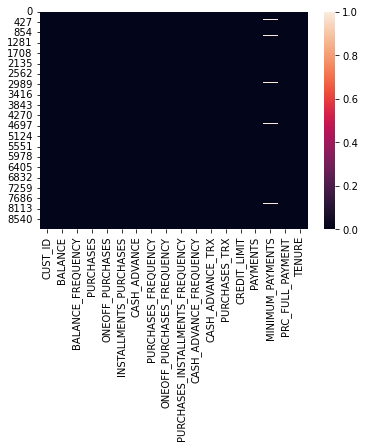

In [8]:
sns.heatmap(df.isnull());

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
#filling null values with means
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [11]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop('CUST_ID',axis=1, inplace=True)

In [15]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\rodol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rodol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rodol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

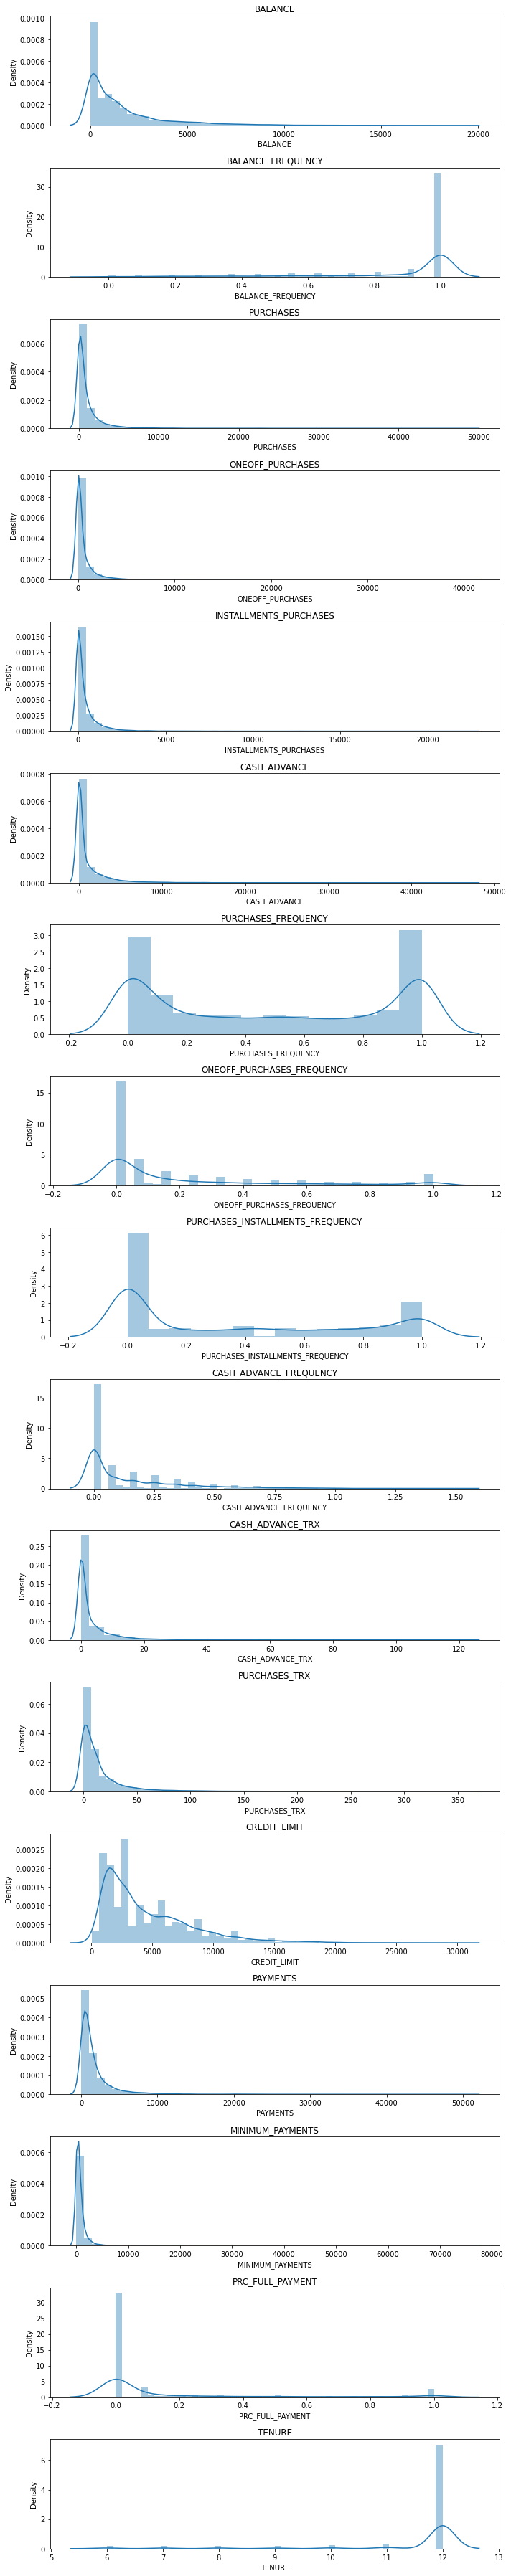

In [16]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde=True)
    plt.title(df.columns[i]);
plt.tight_layout();

<AxesSubplot:>

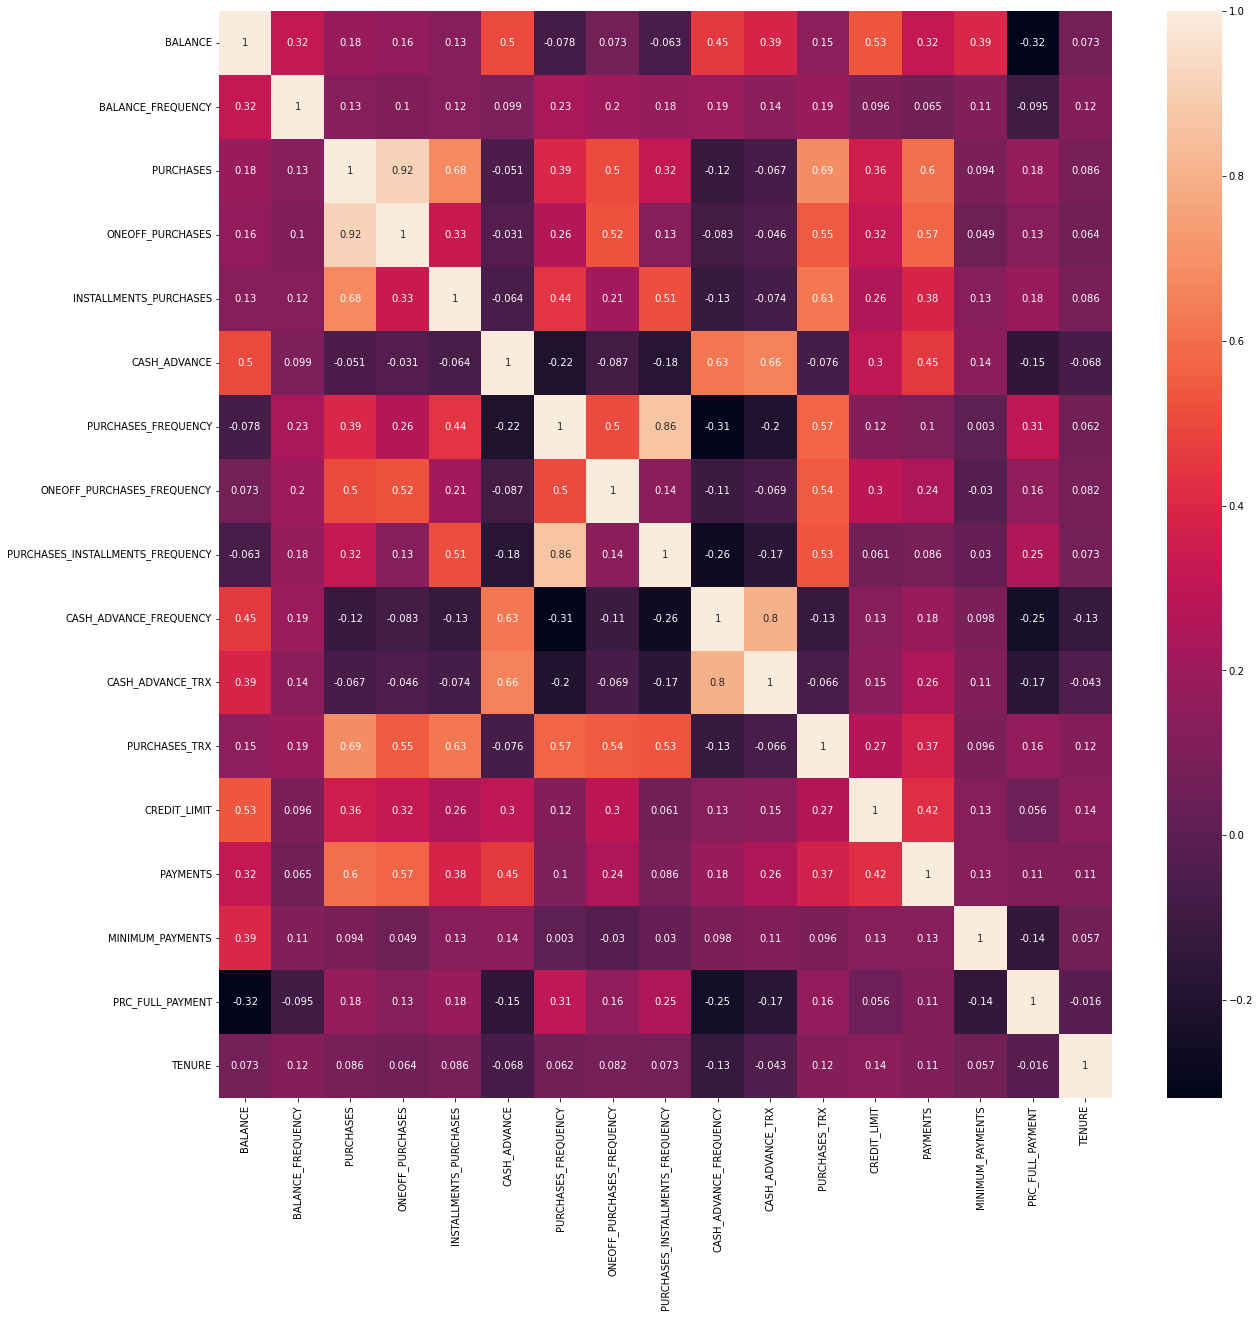

In [17]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [19]:
scaler=StandardScaler()
creditcard_df_scaled=scaler.fit_transform(df)

### Applying the Kmeans algorithm to use the elbow method

In [78]:
wcss_1=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

In [79]:
print(wcss_1)

[152150.00000000006, 127784.82911916393, 111988.80770201722, 99073.93826774818, 91503.39081843372, 84852.01130531782, 79532.40237691787, 74492.31023604335, 69979.31548751728, 66593.60206624128, 63633.146040368214, 61357.140339411315, 59159.24664238638, 57500.101887262696, 56069.103915563624, 54546.28939321434, 53302.3090470249, 51808.48408570873, 51019.37992899134]


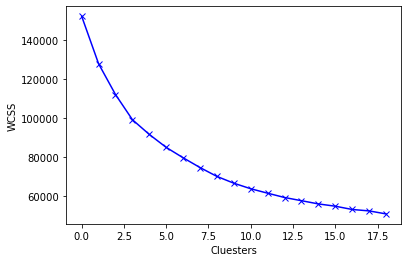

In [27]:
plt.plot(wcss_1,'bx-')
plt.xlabel('Cluesters')
plt.ylabel('WCSS');

8 clusters show the best performance

In [30]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels=kmeans.labels_

In [31]:
labels

array([0, 3, 1, ..., 7, 7, 7])

In [32]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2766, 1123, 2016,  882,  330, 1184,   23,  626], dtype=int64))

In [33]:
# centroids
kmeans.cluster_centers_

array([[ 7.26140838e-03,  4.04218615e-01, -3.54546636e-01,
        -2.39279161e-01, -3.98613476e-01, -9.96928968e-02,
        -8.42330646e-01, -3.84931578e-01, -7.50951117e-01,
         9.33384076e-02, -3.55614472e-02, -4.78214414e-01,
        -3.06243006e-01, -2.52035345e-01, -1.33263299e-02,
        -4.54891857e-01,  2.73960665e-01],
       [-1.18892000e-01,  4.03177227e-01,  5.63359691e-01,
         6.83577842e-01,  7.60015633e-02, -3.31953036e-01,
         9.97144746e-01,  1.91386854e+00,  2.12454959e-01,
        -4.15090009e-01, -3.31882650e-01,  6.58778199e-01,
         4.58612594e-01,  1.62036654e-01, -1.54478923e-01,
         4.53929887e-01,  2.72847099e-01],
       [-3.58066748e-01,  3.32433084e-01, -2.95233282e-02,
        -2.40735009e-01,  3.72267273e-01, -3.62520244e-01,
         9.97180199e-01, -3.81258869e-01,  1.20881402e+00,
        -4.71902654e-01, -3.59553411e-01,  1.95129411e-01,
        -2.56957254e-01, -2.13061687e-01, -2.97766650e-02,
         3.14763023e-01,  2.5

Checking the mean values of each cluster

In [35]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.007261,0.404219,-0.354547,-0.239279,-0.398613,-0.099693,-0.842331,-0.384932,-0.750951,0.093338,-0.035561,-0.478214,-0.306243,-0.252035,-0.013326,-0.454892,0.273961
1,-0.118892,0.403177,0.563360,0.683578,0.076002,-0.331953,0.997145,1.913869,0.212455,-0.415090,-0.331883,0.658778,0.458613,0.162037,-0.154479,0.453930,0.272847
2,-0.358067,0.332433,-0.029523,-0.240735,0.372267,-0.362520,0.997180,-0.381259,1.208814,-0.471903,-0.359553,0.195129,-0.256957,-0.213062,-0.029777,0.314763,0.256155
3,1.670552,0.390820,-0.221894,-0.158221,-0.234052,1.996404,-0.483246,-0.214536,-0.422931,1.909673,1.915356,-0.272044,1.013781,0.812028,0.546976,-0.391516,0.071780
4,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
5,-0.700877,-2.137091,-0.309691,-0.234294,-0.301706,-0.322766,-0.552479,-0.440575,-0.438122,-0.521893,-0.376564,-0.418027,-0.174468,-0.201632,-0.256966,0.284727,0.202901
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
7,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669


Checking out this values in a dataframe

In [37]:
cluster_centers=scaler.inverse_transform(cluster_centers)

In [38]:
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1579.588836,0.973026,245.710481,195.282972,50.606424,769.810451,0.152283,0.087625,0.065990,0.153822,3.006146,2.823210,3380.212099,1003.526222,833.150093,0.020667,11.883948
1,1317.011166,0.972780,2206.831496,1727.036581,479.794915,282.750088,0.890553,0.773402,0.448872,0.052080,0.983972,31.084595,6163.069700,2202.224090,504.199929,0.286481,11.882458
2,819.189116,0.956021,940.127788,192.866562,747.704320,218.649226,0.890567,0.088721,0.844851,0.040712,0.795139,19.560020,3559.533830,1116.351146,794.813281,0.245777,11.860119
3,5041.588623,0.969852,529.124615,329.822698,199.417188,5165.424239,0.296400,0.138457,0.196354,0.517289,16.319728,7.947846,8182.998351,4083.885908,2138.911588,0.039203,11.613379
4,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
5,105.658418,0.371014,341.544831,203.556740,138.238767,302.015981,0.268614,0.071026,0.190316,0.030708,0.679054,4.319257,3859.661693,1149.438393,265.357443,0.236993,11.788851
6,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
7,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019


In [41]:
# Including clusters on dataframe
creditcard_df_cluster=pd.concat([df,pd.DataFrame({'CLUSTER':labels})],axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


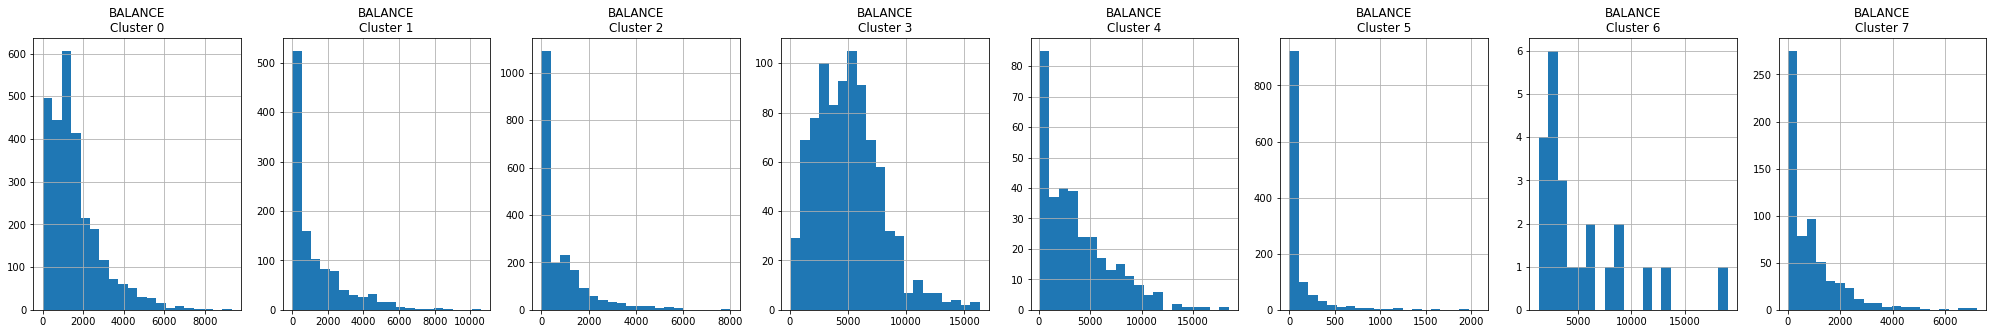

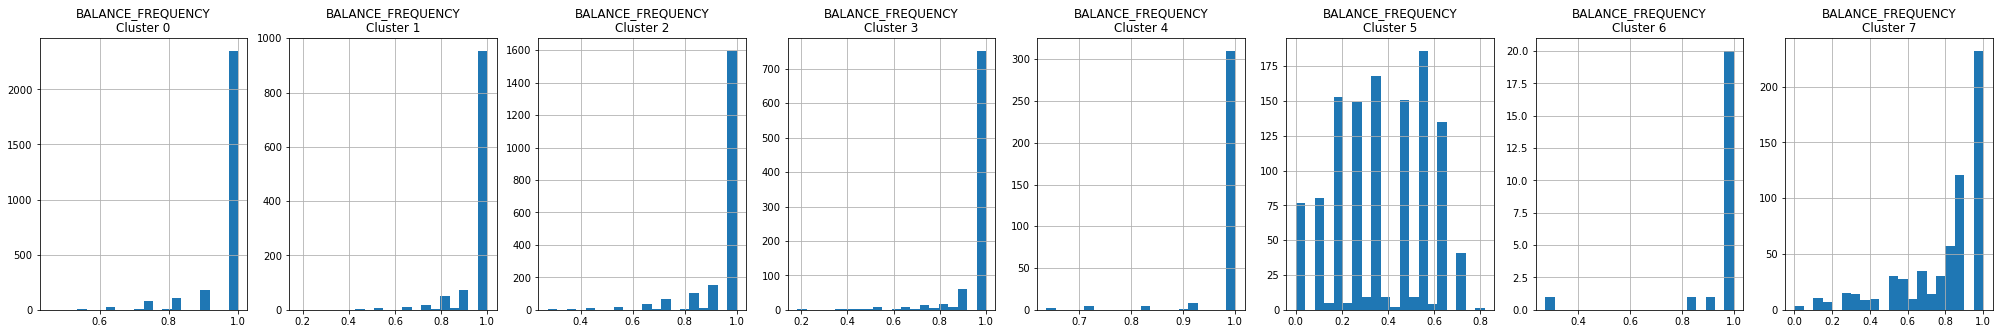

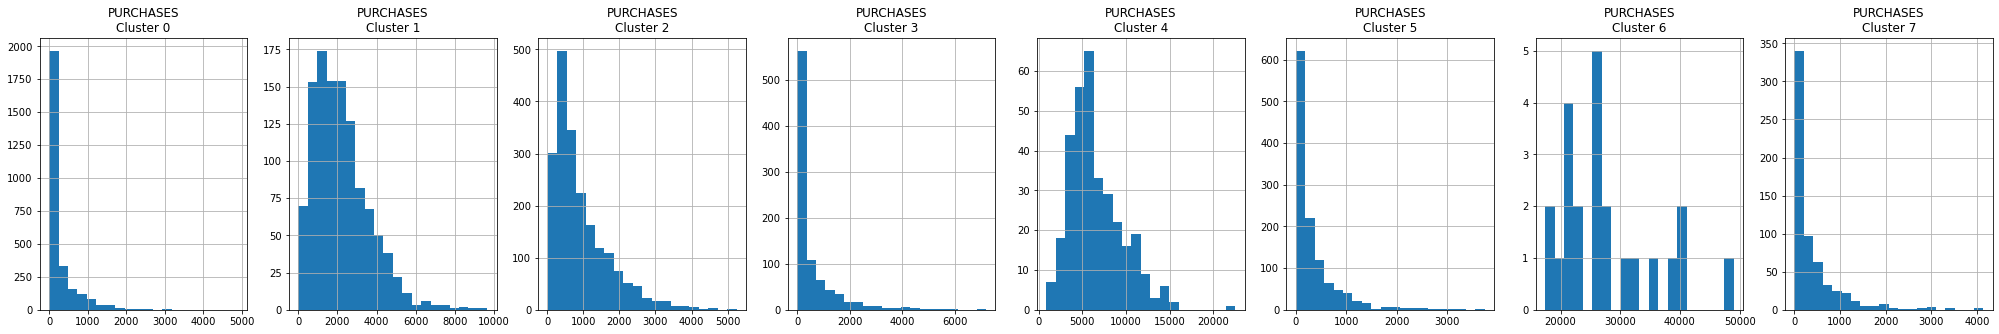

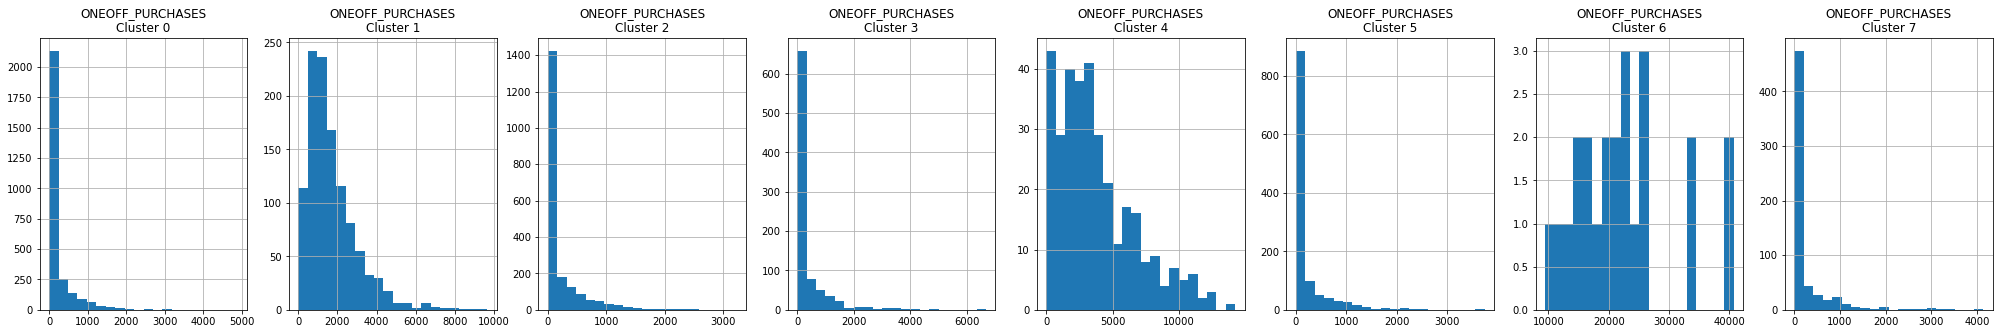

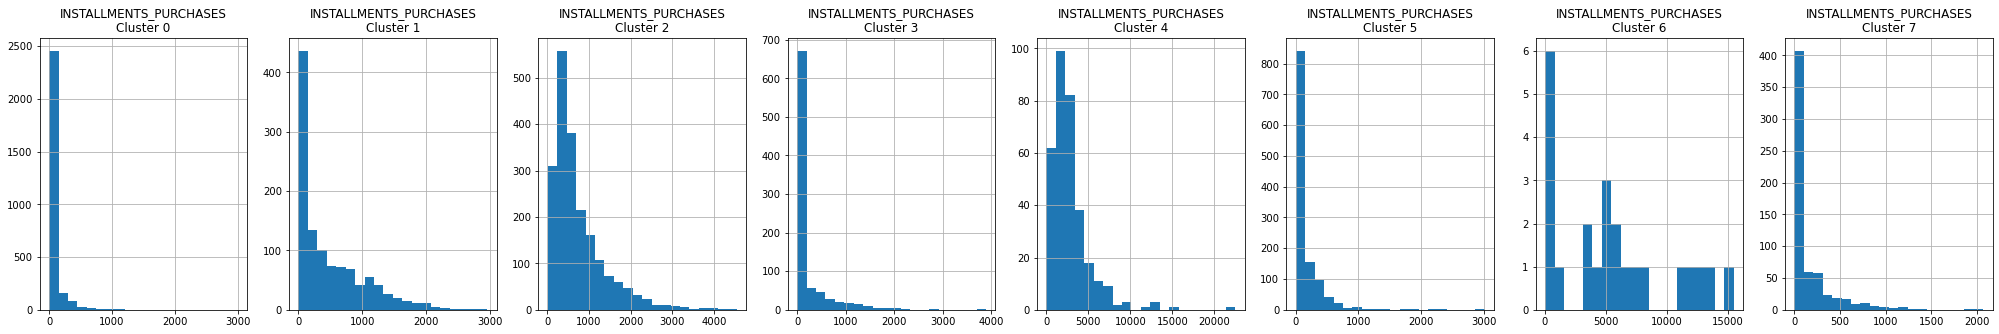

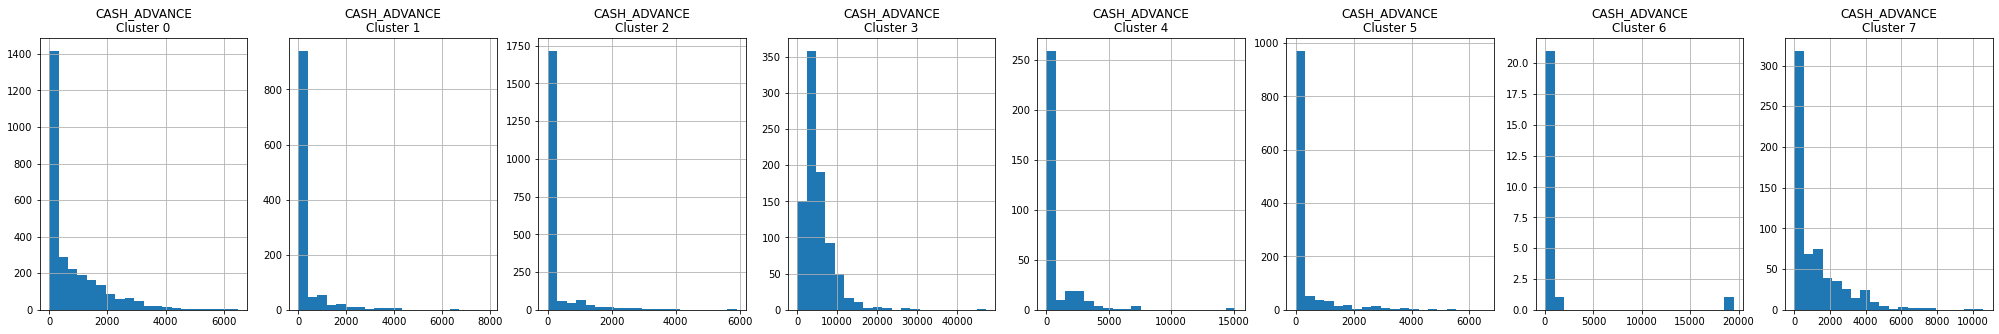

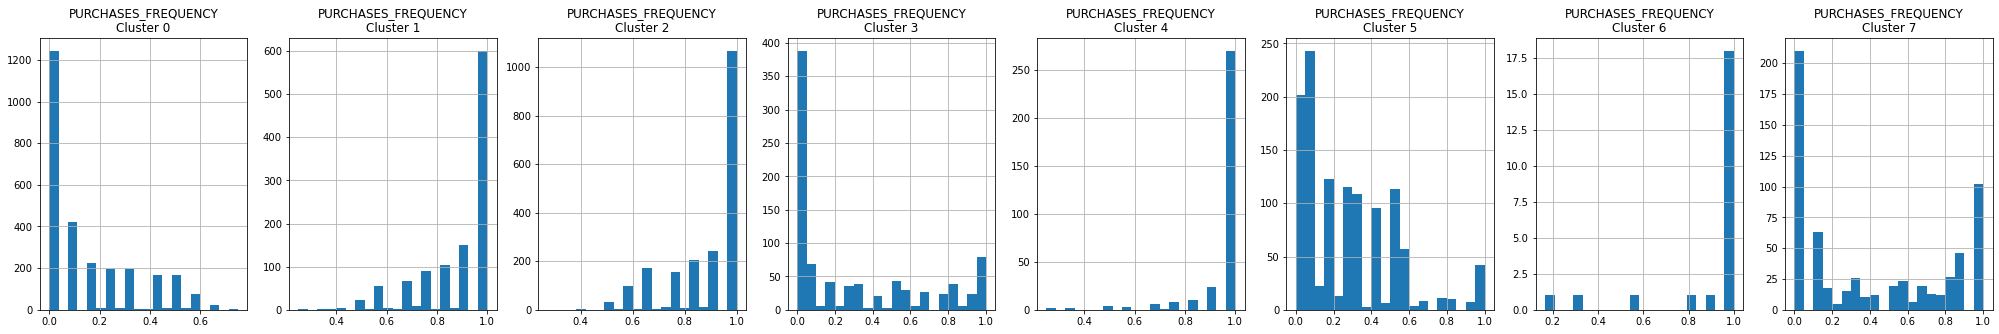

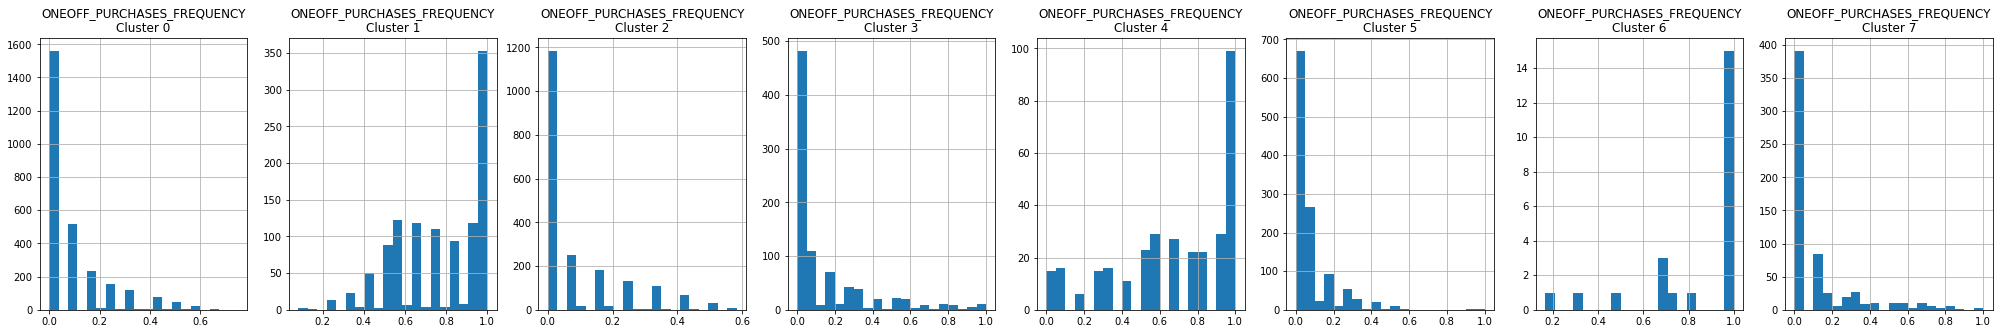

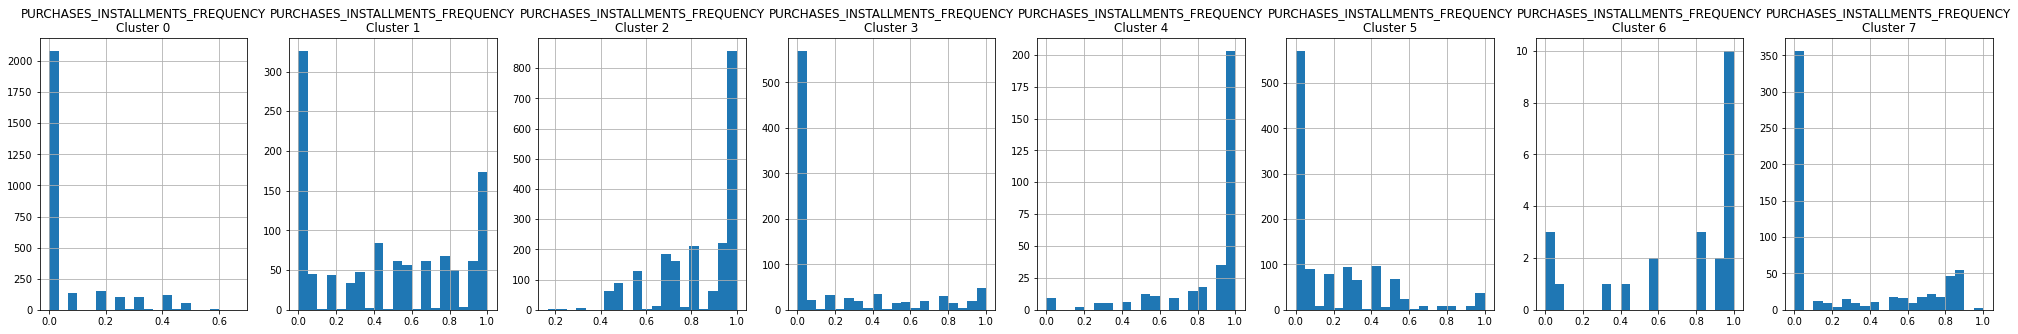

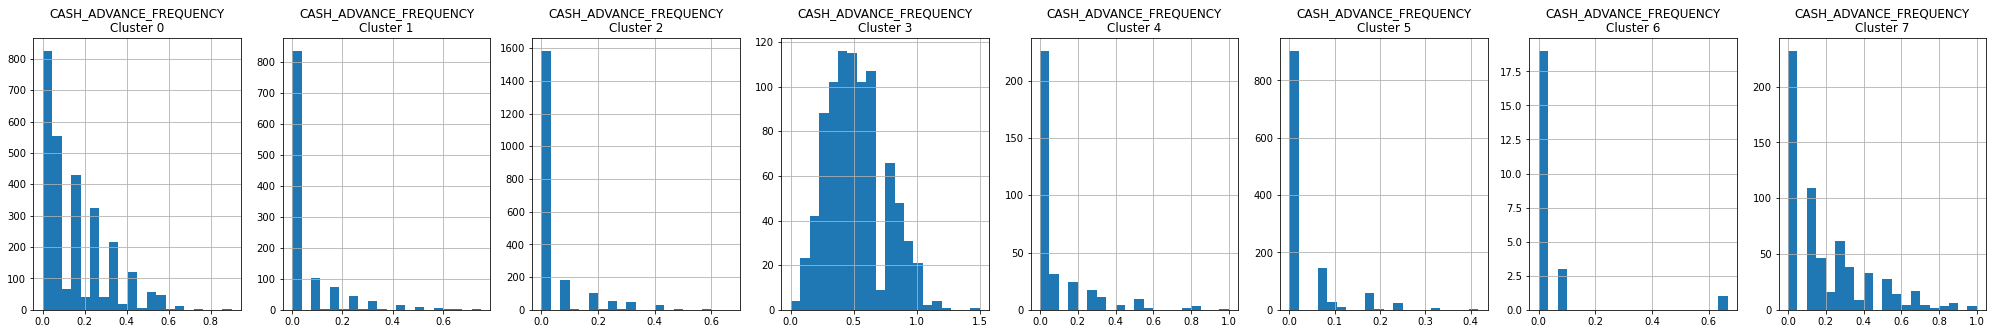

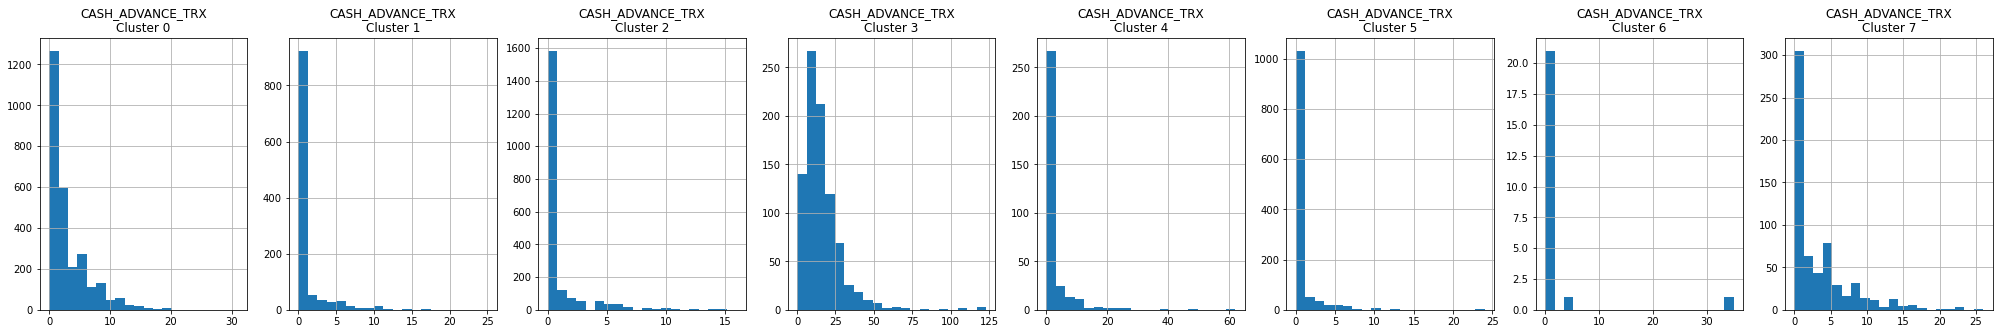

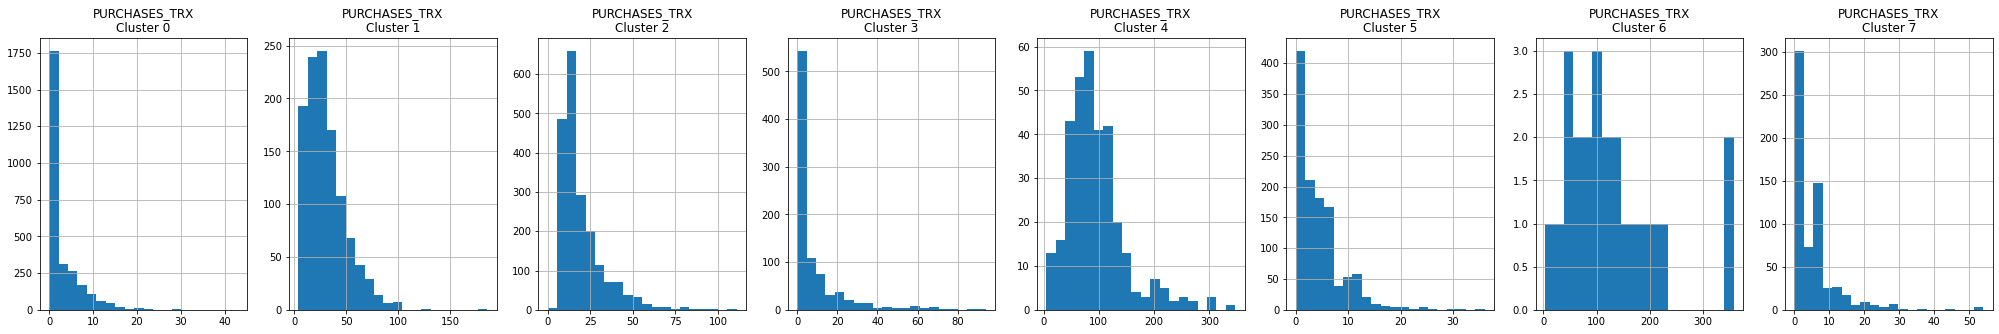

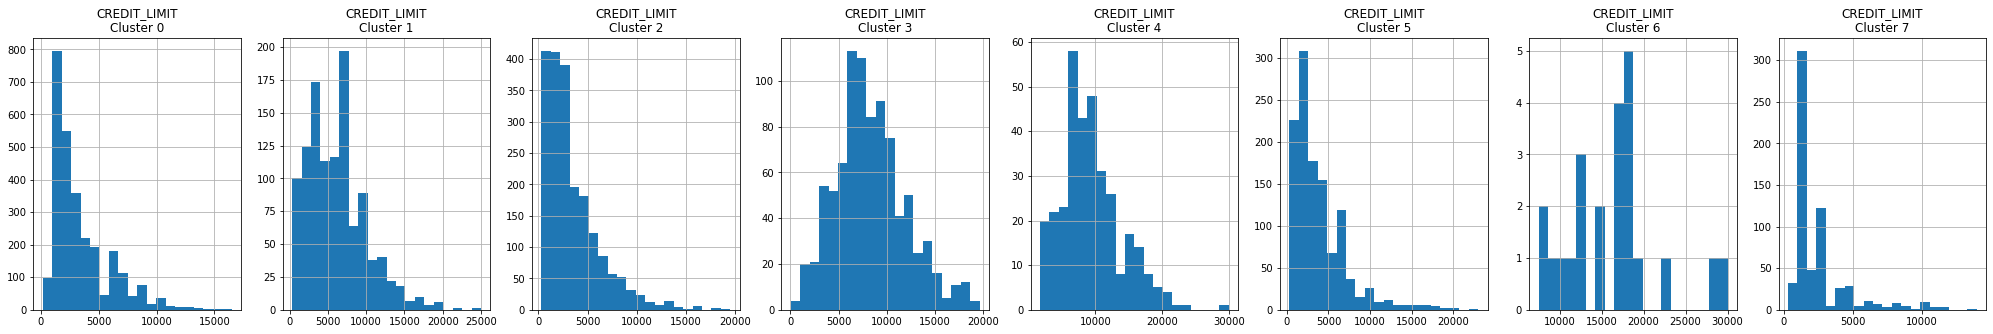

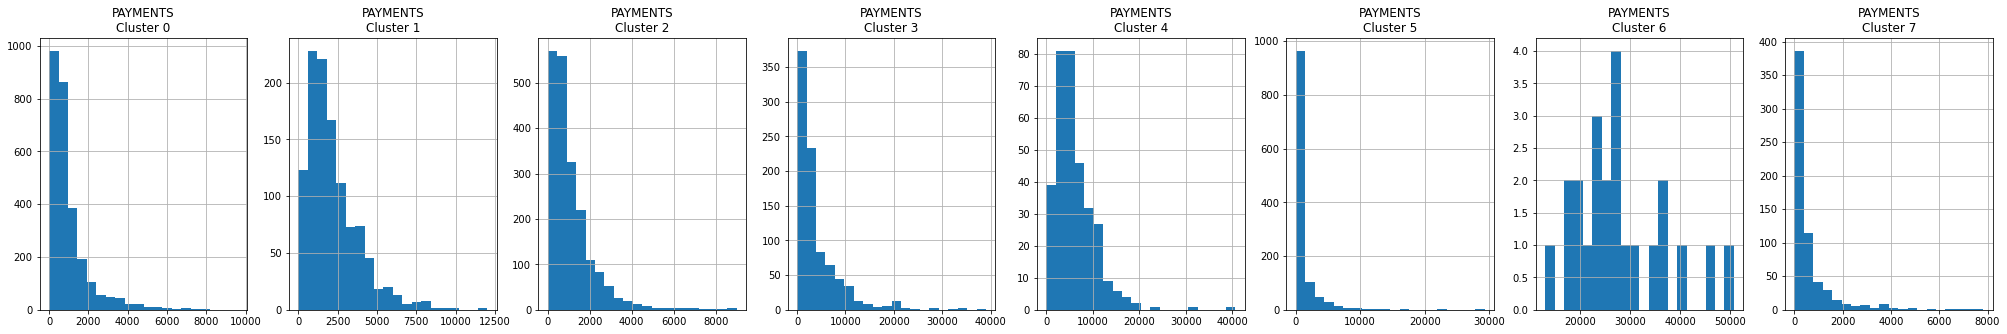

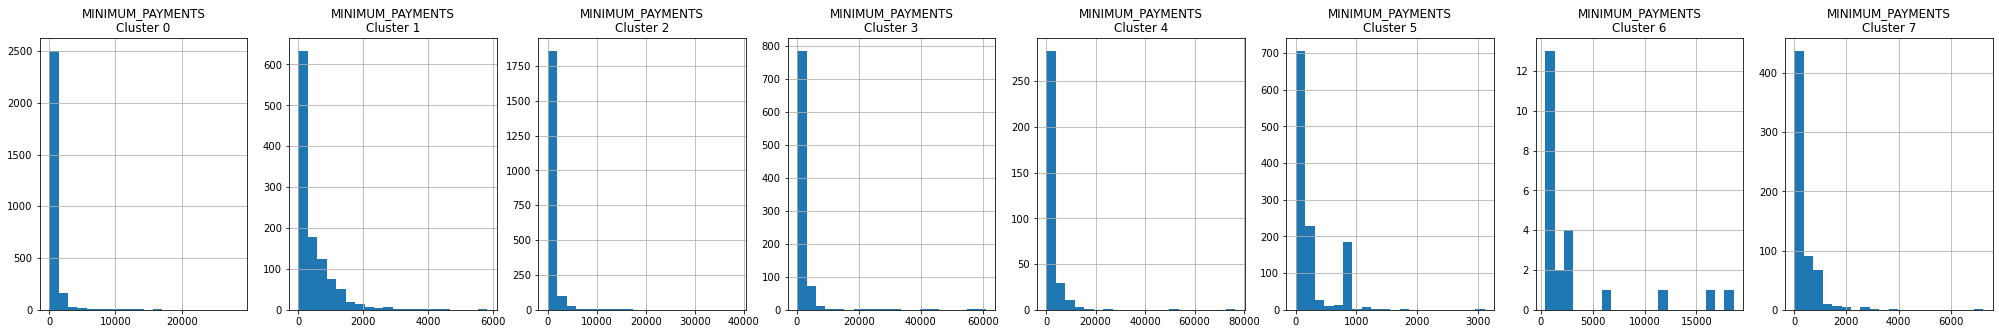

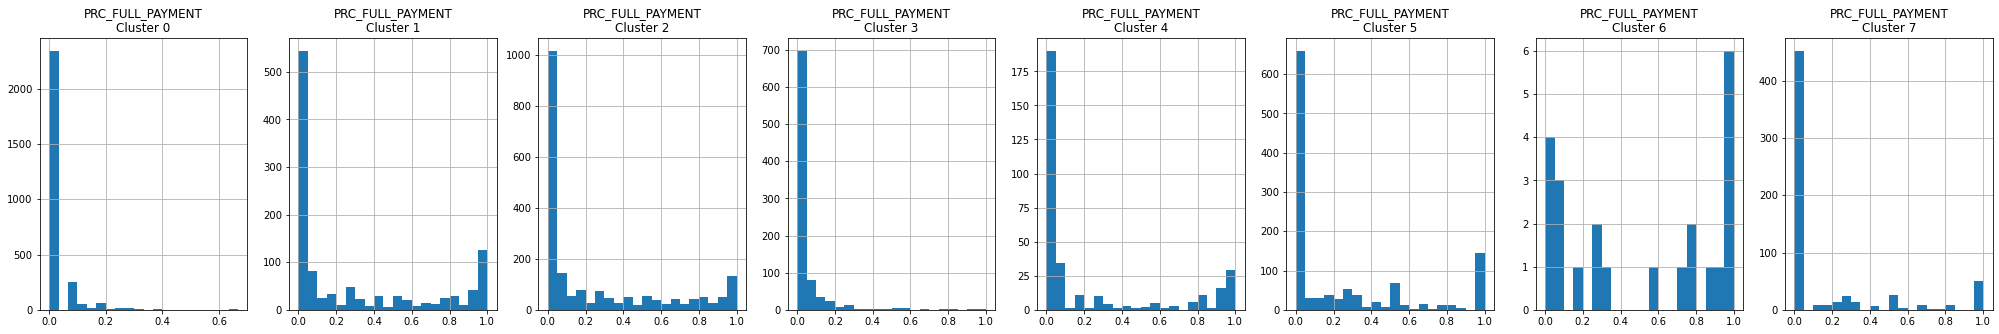

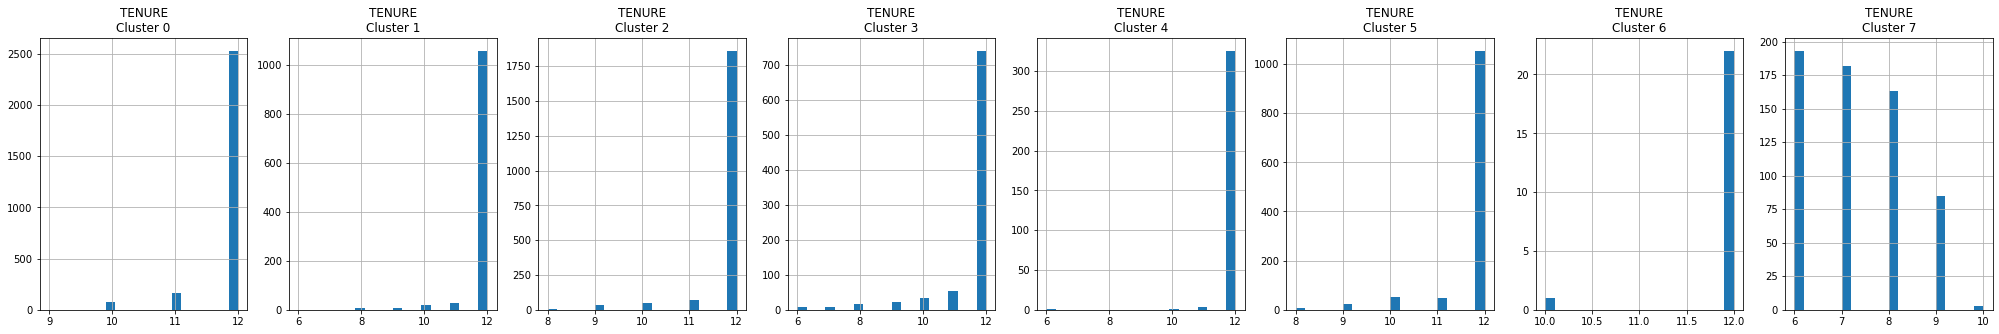

In [45]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['CLUSTER']==j]
        cluster[i].hist(bins=20)
        plt.title('{}\nCluster {}'.format(i,j))
    plt.show()

In [46]:
order=creditcard_df_cluster.sort_values(by='CLUSTER')
order.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4230,2063.855487,1.000000,220.4,220.4,0.0,2274.848149,0.083333,0.083333,0.000000,0.666667,11,1,2500.0,468.683047,441.951462,0.0,12,0
4233,1117.003540,1.000000,240.0,240.0,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,9,1200.0,366.532467,1020.099462,0.0,12,0
4234,198.815177,1.000000,247.5,0.0,247.5,0.000000,0.166667,0.000000,0.166667,0.000000,0,3,4000.0,283.508460,249.335824,0.0,12,0
4236,1534.165790,1.000000,0.0,0.0,0.0,635.299075,0.000000,0.000000,0.000000,0.583333,11,0,1800.0,681.290050,439.318862,0.0,12,0


# PCA vision of the components

In [47]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221923, -1.07645238],
       [-1.13829323,  2.5064703 ],
       [ 0.96968326, -0.38351684],
       ...,
       [-0.92620307, -1.81078499],
       [-2.33655173, -0.65796513],
       [-0.55642483, -0.40046281]])

In [49]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076452
1,-1.138293,2.506470
2,0.969683,-0.383517
3,-0.873626,0.043160
4,-1.599433,-0.688580


In [52]:
pca_df=pd.concat([pca_df,pd.DataFrame({'clusters':labels})],axis=1)
pca_df.head()

,pca1,pca2,clusters
0,-1.682219,-1.076452,0
1,-1.138293,2.506470,3
2,0.969683,-0.383517,1
3,-0.873626,0.043160,0
4,-1.599433,-0.688580,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

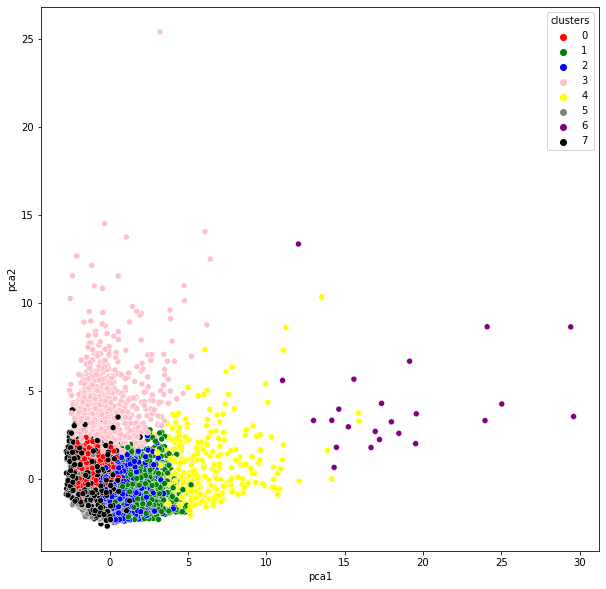

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',hue='clusters',data=pca_df,palette=['red','green','blue','pink','yellow','gray','purple','black'])

# Autoenconders

In [58]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [59]:
input_df=Input(shape=(17,))
x=Dense(500,activation='relu')(input_df)
x=Dense(2000,activation='relu')(x)

encoded=Dense(10,activation='relu')(x)

x=Dense(2000,activation='relu')(encoded)
x=Dense(500,activation='relu')(x)
decoded=Dense(17,activation='relu')(x)

In [61]:
autoencoded=Model(input_df,decoded)

In [62]:
encoder=Model(input_df,encoded)

In [65]:
autoencoded.compile(optimizer='Adam',loss='mean_squared_error')

In [66]:
autoencoded.fit(creditcard_df_scaled,creditcard_df_scaled,epochs=50)

Epoch 1/50
280/280 [==============================] - 9s 28ms/step - loss: 0.5338
Epoch 2/50
280/280 [==============================] - 8s 28ms/step - loss: 0.4346
Epoch 3/50
280/280 [==============================] - 9s 31ms/step - loss: 0.4278
Epoch 4/50
280/280 [==============================] - 8s 30ms/step - loss: 0.4192
Epoch 5/50
280/280 [==============================] - 9s 30ms/step - loss: 0.3802
Epoch 6/50
280/280 [==============================] - 8s 30ms/step - loss: 0.3776
Epoch 7/50
280/280 [==============================] - 8s 30ms/step - loss: 0.3799
Epoch 8/50
280/280 [==============================] - 8s 30ms/step - loss: 0.3712
Epoch 9/50
280/280 [==============================] - 8s 27ms/step - loss: 0.3630
Epoch 10/50
280/280 [==============================] - 8s 30ms/step - loss: 0.3674
Epoch 11/50
280/280 [==============================] - 8s 29ms/step - loss: 0.3642
Epoch 12/50
280/280 [==============================] - 8s 30ms/step - loss: 0.3556
Epoch 13/50
2

In [68]:
compact=encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 3ms/step


In [69]:
compact[0]

array([0.20366706, 0.01094065, 0.5359381 , 0.        , 0.12496613,
       0.        , 0.09439471, 0.80496305, 0.18979435, 0.43595472],
      dtype=float32)

In [75]:
wcss_2=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

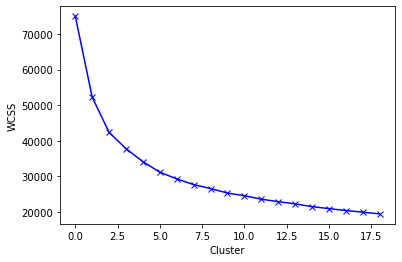

In [76]:
plt.plot(wcss_2,'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

C:\Users\rodol\AppData\Local\Temp\ipykernel_15856\3357599021.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1,'bx-',color='r')
C:\Users\rodol\AppData\Local\Temp\ipykernel_15856\3357599021.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2,'bx-',color='b');


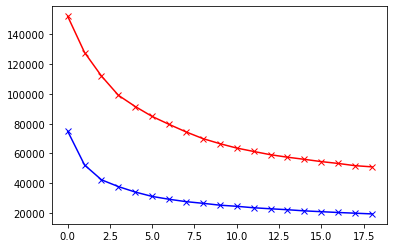

In [80]:
plt.plot(wcss_1,'bx-',color='r')
plt.plot(wcss_2,'bx-',color='b');

In [81]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [82]:
labels=kmeans.labels_
labels,labels.shape

(array([1, 0, 1, ..., 1, 1, 1]), (8950,))

In [84]:
df_cluster_at=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [85]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(compact)
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.355090,-0.107078
1,0.622430,1.217036
2,-0.317788,-0.101108
3,-0.649093,0.037065
4,-1.423317,-0.178616


In [86]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.355090,-0.107078,1
1,0.622430,1.217036,0
2,-0.317788,-0.101108,1
3,-0.649093,0.037065,1
4,-1.423317,-0.178616,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

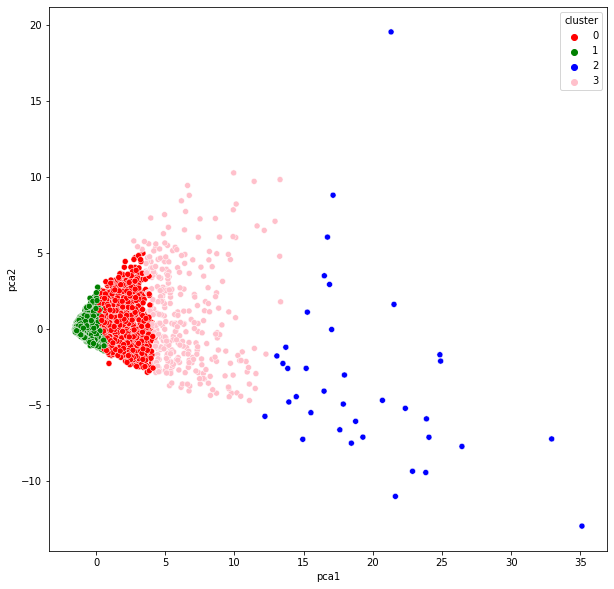

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','pink'])

In [89]:
df_order=df_cluster_at.sort_values(by='cluster')
df_order.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1547,8767.569300,1.0,0.00,0.00,0.00,4582.065405,0.00,0.000000,0.00,0.250000,10,0,9000.0,1824.244866,2259.461833,0.0,12,0
1794,6937.806466,1.0,339.75,0.00,339.75,0.000000,0.25,0.000000,0.25,0.000000,0,3,10500.0,2163.154746,3228.084937,0.0,12,0
1795,7888.028118,1.0,0.00,0.00,0.00,1282.985376,0.00,0.000000,0.00,0.333333,7,0,12000.0,1685.554741,2145.585863,0.0,12,0
3932,1693.841127,1.0,2439.98,1373.89,1066.09,1068.614851,1.00,0.750000,1.00,0.333333,7,45,5500.0,1474.677315,507.969189,0.0,12,0
1797,4751.924842,1.0,1394.93,576.13,818.80,0.000000,1.00,0.333333,1.00,0.000000,0,37,5000.0,2635.439016,4247.464410,0.0,12,0
